
# Importing Libraries


In [3347]:
import pandas as pd
import numpy as np

### Importing dataset

In [3348]:
#data = pd.read_csv("Patient_Data.csv")
data = pd.read_excel("Patient_Data.xlsx")

In [3349]:
data.head()

,Name,Stroke volume,PRN,age,gender,date of onset,time of onset,date of admission,date of discharge,cell1,...,V54,ecosprine,clopidogril,thrombolysis,thrombolytic agent,anticoagulation,mechanical thrombectomy,decompressive hemicranectomy,MRS,barthel index
0,pandurang salunkhe,0.053275,120205789.0,78.0,1.0,2023-09-01 00:00:00,11:50:00,2023-09-01,2023-09-04,9.850008e+09,...,NaN,2.0,2.0,2.0,4.0,8.0,2.0,2.0,6.0,0.0
1,Nathu Shelar,0.130765,230402432.0,70.0,1.0,NaN,NaN,2023-04-16,2023-04-20,9.405432e+09,...,NaN,1.0,1.0,2.0,4.0,8.0,2.0,2.0,6.0,0.0
2,Dhondiram Mule,0.251843,230900449.0,76.0,1.0,2023-09-01 00:00:00,NaN,2023-09-04,2023-09-12,9.822498e+09,...,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,6.0,0.0
3,Parshuram Shinde,0.266373,230305267.0,80.0,1.0,NaN,NaN,2023-03-27,NaT,9.850833e+09,...,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,6.0,0.0
4,Nandkumar Ranawade,0.276052,230202594.0,68.0,1.0,NaN,NaN,2023-02-13,2023-02-15,9.820925e+09,...,NaN,1.0,1.0,1.0,1.0,8.0,NaN,NaN,6.0,0.0


In [3350]:
data.shape

(167, 53)

In [3351]:
data.isna().sum()

Name                              8
Stroke volume                     8
PRN                              17
age                              10
gender                            9
date of onset                    60
time of onset                    74
date of admission                11
date of discharge                40
cell1                            23
cell2                           141
NIHSS                            13
SHT                              11
DM                               11
Alcohol                          11
smoking                          11
tobacco                          11
dyslipidaemia                    11
atrial fibrillation              11
IHD                              11
rheumatic heart disease          11
other risk factors               90
haemoglobin                      16
PCV                              38
MCV                             105
Homocystiene                     29
HbA1C                            46
Cholesterol                 

In [3352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          159 non-null    object        
 1   Stroke volume                 159 non-null    float64       
 2   PRN                           150 non-null    float64       
 3   age                           157 non-null    float64       
 4   gender                        158 non-null    float64       
 5   date of onset                 107 non-null    object        
 6   time of onset                 93 non-null     object        
 7   date of admission             156 non-null    datetime64[ns]
 8   date of discharge             127 non-null    datetime64[ns]
 9   cell1                         144 non-null    float64       
 10  cell2                         26 non-null     float64       
 11  NIHSS                         15

In [3353]:
data.nunique()

Name                            157
Stroke volume                   156
PRN                             113
age                              55
gender                            2
date of onset                    91
time of onset                    47
date of admission               133
date of discharge               108
cell1                           139
cell2                            26
NIHSS                            21
SHT                               2
DM                                2
Alcohol                           2
smoking                           2
tobacco                           2
dyslipidaemia                     2
atrial fibrillation               2
IHD                               2
rheumatic heart disease           2
other risk factors               76
haemoglobin                      69
PCV                             102
MCV                              56
Homocystiene                    123
HbA1C                            56
Cholesterol                 

### Dropping unnecesaary Features

In [3354]:
data.columns

Index(['Name', 'Stroke volume', 'PRN', 'age', 'gender', 'date of onset',
       'time of onset', 'date of admission', 'date of discharge', 'cell1',
       'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
       'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'LDL cholesterol',
       'HDL Cholesterol', 'Triglycerides', 'V LDL', 'b 12',
       'other investigations', 'strokevolume', 'MRI Brain', 'CT Angiography',
       'V53', 'CT ASPECTS', 'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine',
       'clopidogril', 'thrombolysis', 'thrombolytic agent', 'anticoagulation',
       'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
       'barthel index'],
      dtype='object')

In [3355]:

#important_features = ['Name', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
 #      'dyslipidaemia', 'atrial fibrillation', 'IHD',
   #    'rheumatic heart disease', 'haemoglobin', 'PCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'LDL cholesterol',
    #   'HDL Cholesterol', 'Triglycerides', 'V LDL', 'b 12', 'ecosprine',
    #   'clopidogril', 'thrombolysis', 'thrombolytic agent', 'anticoagulation',
     #  'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
    #   'barthel index']

In [3356]:
important_features = ['Name', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
      'dyslipidaemia', 'atrial fibrillation', 'IHD',
      'rheumatic heart disease', 'haemoglobin', 'Homocystiene', 'CT ASPECTS', 'MRS',
       'barthel index']

In [3357]:
data = data[important_features]

In [3358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     159 non-null    object 
 1   Stroke volume            159 non-null    float64
 2   age                      157 non-null    float64
 3   gender                   158 non-null    float64
 4   NIHSS                    154 non-null    float64
 5   SHT                      156 non-null    float64
 6   DM                       156 non-null    float64
 7   Alcohol                  156 non-null    float64
 8   smoking                  156 non-null    float64
 9   tobacco                  156 non-null    float64
 10  dyslipidaemia            156 non-null    float64
 11  atrial fibrillation      156 non-null    float64
 12  IHD                      156 non-null    float64
 13  rheumatic heart disease  156 non-null    float64
 14  haemoglobin              1

- Storke Volume is Object , we need all the stroke volume as float

In [3359]:
for index, value in data['Stroke volume'].items():
    # Check if each value can be converted to a float
    try:
        float(value)
    except ValueError:
        # If not a float, drop the row
        data.drop(index, inplace=True)

In [3360]:
data['Stroke volume'] = pd.to_numeric(data['Stroke volume'], errors='coerce')

In [3361]:
data.shape

(167, 19)

In [3362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     159 non-null    object 
 1   Stroke volume            159 non-null    float64
 2   age                      157 non-null    float64
 3   gender                   158 non-null    float64
 4   NIHSS                    154 non-null    float64
 5   SHT                      156 non-null    float64
 6   DM                       156 non-null    float64
 7   Alcohol                  156 non-null    float64
 8   smoking                  156 non-null    float64
 9   tobacco                  156 non-null    float64
 10  dyslipidaemia            156 non-null    float64
 11  atrial fibrillation      156 non-null    float64
 12  IHD                      156 non-null    float64
 13  rheumatic heart disease  156 non-null    float64
 14  haemoglobin              1

## Dealing with NULL values

- Checking Null Stroke Volume

In [3363]:
data["Stroke volume"].isna().sum()

8

- Checking NULL MRS value

In [3364]:
data['MRS'].isna().sum()

12

In [3365]:
data.shape

(167, 19)

### Dropping NULL MRS and NULL Stroke Volume


In [3366]:
data.dropna(subset=['MRS'], inplace=True)

In [3367]:
data.shape

(155, 19)

In [3368]:
data['Stroke volume'].isna().sum()

0

In [3369]:
data.dropna(subset=['Stroke volume'],inplace =True)

In [3370]:
data.shape

(155, 19)

In [3371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 162
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     155 non-null    object 
 1   Stroke volume            155 non-null    float64
 2   age                      153 non-null    float64
 3   gender                   154 non-null    float64
 4   NIHSS                    150 non-null    float64
 5   SHT                      152 non-null    float64
 6   DM                       152 non-null    float64
 7   Alcohol                  152 non-null    float64
 8   smoking                  152 non-null    float64
 9   tobacco                  152 non-null    float64
 10  dyslipidaemia            152 non-null    float64
 11  atrial fibrillation      152 non-null    float64
 12  IHD                      152 non-null    float64
 13  rheumatic heart disease  152 non-null    float64
 14  haemoglobin              147 no

In [3372]:
data.head()

,Name,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,atrial fibrillation,IHD,rheumatic heart disease,haemoglobin,Homocystiene,CT ASPECTS,MRS,barthel index
0,pandurang salunkhe,0.053275,78.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,13.2,28.51,NaN,6.0,0.0
1,Nathu Shelar,0.130765,70.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,11.2,71.00,9.0,6.0,0.0
2,Dhondiram Mule,0.251843,76.0,1.0,10.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,31.25,NaN,6.0,0.0
3,Parshuram Shinde,0.266373,80.0,1.0,24.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,12.6,14.50,9.0,6.0,0.0
4,Nandkumar Ranawade,0.276052,68.0,1.0,8.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,12.1,66.00,10.0,6.0,0.0


In [3373]:
data.drop(columns=["Name"], inplace=True)

In [3374]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,atrial fibrillation,IHD,rheumatic heart disease,haemoglobin,Homocystiene,CT ASPECTS,MRS,barthel index
0,0.053275,78.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,13.2,28.51,NaN,6.0,0.0
1,0.130765,70.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,11.2,71.00,9.0,6.0,0.0
2,0.251843,76.0,1.0,10.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,31.25,NaN,6.0,0.0
3,0.266373,80.0,1.0,24.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,12.6,14.50,9.0,6.0,0.0
4,0.276052,68.0,1.0,8.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,12.1,66.00,10.0,6.0,0.0


## Ajusting Binary Values

In [3375]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [3376]:
data.reset_index(inplace=True, drop=True)

In [3377]:
data

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,atrial fibrillation,IHD,rheumatic heart disease,haemoglobin,Homocystiene,CT ASPECTS,MRS,barthel index
0,0.053275,78.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.2,28.51,NaN,6.0,0.0
1,0.130765,70.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.2,71.00,9.0,6.0,0.0
2,0.251843,76.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,31.25,NaN,6.0,0.0
3,0.266373,80.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.6,14.50,9.0,6.0,0.0
4,0.276052,68.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,12.1,66.00,10.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,67.707100,65.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.51,7.0,1.0,100.0
151,0.460098,62.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.4,52.70,NaN,6.0,0.0
152,56.451600,85.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6.0,0.0
153,2.310180,79.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9,18.40,NaN,2.0,65.0


In [3378]:
data.to_csv('modified_data.csv', index=False)

## Correlation Matrix

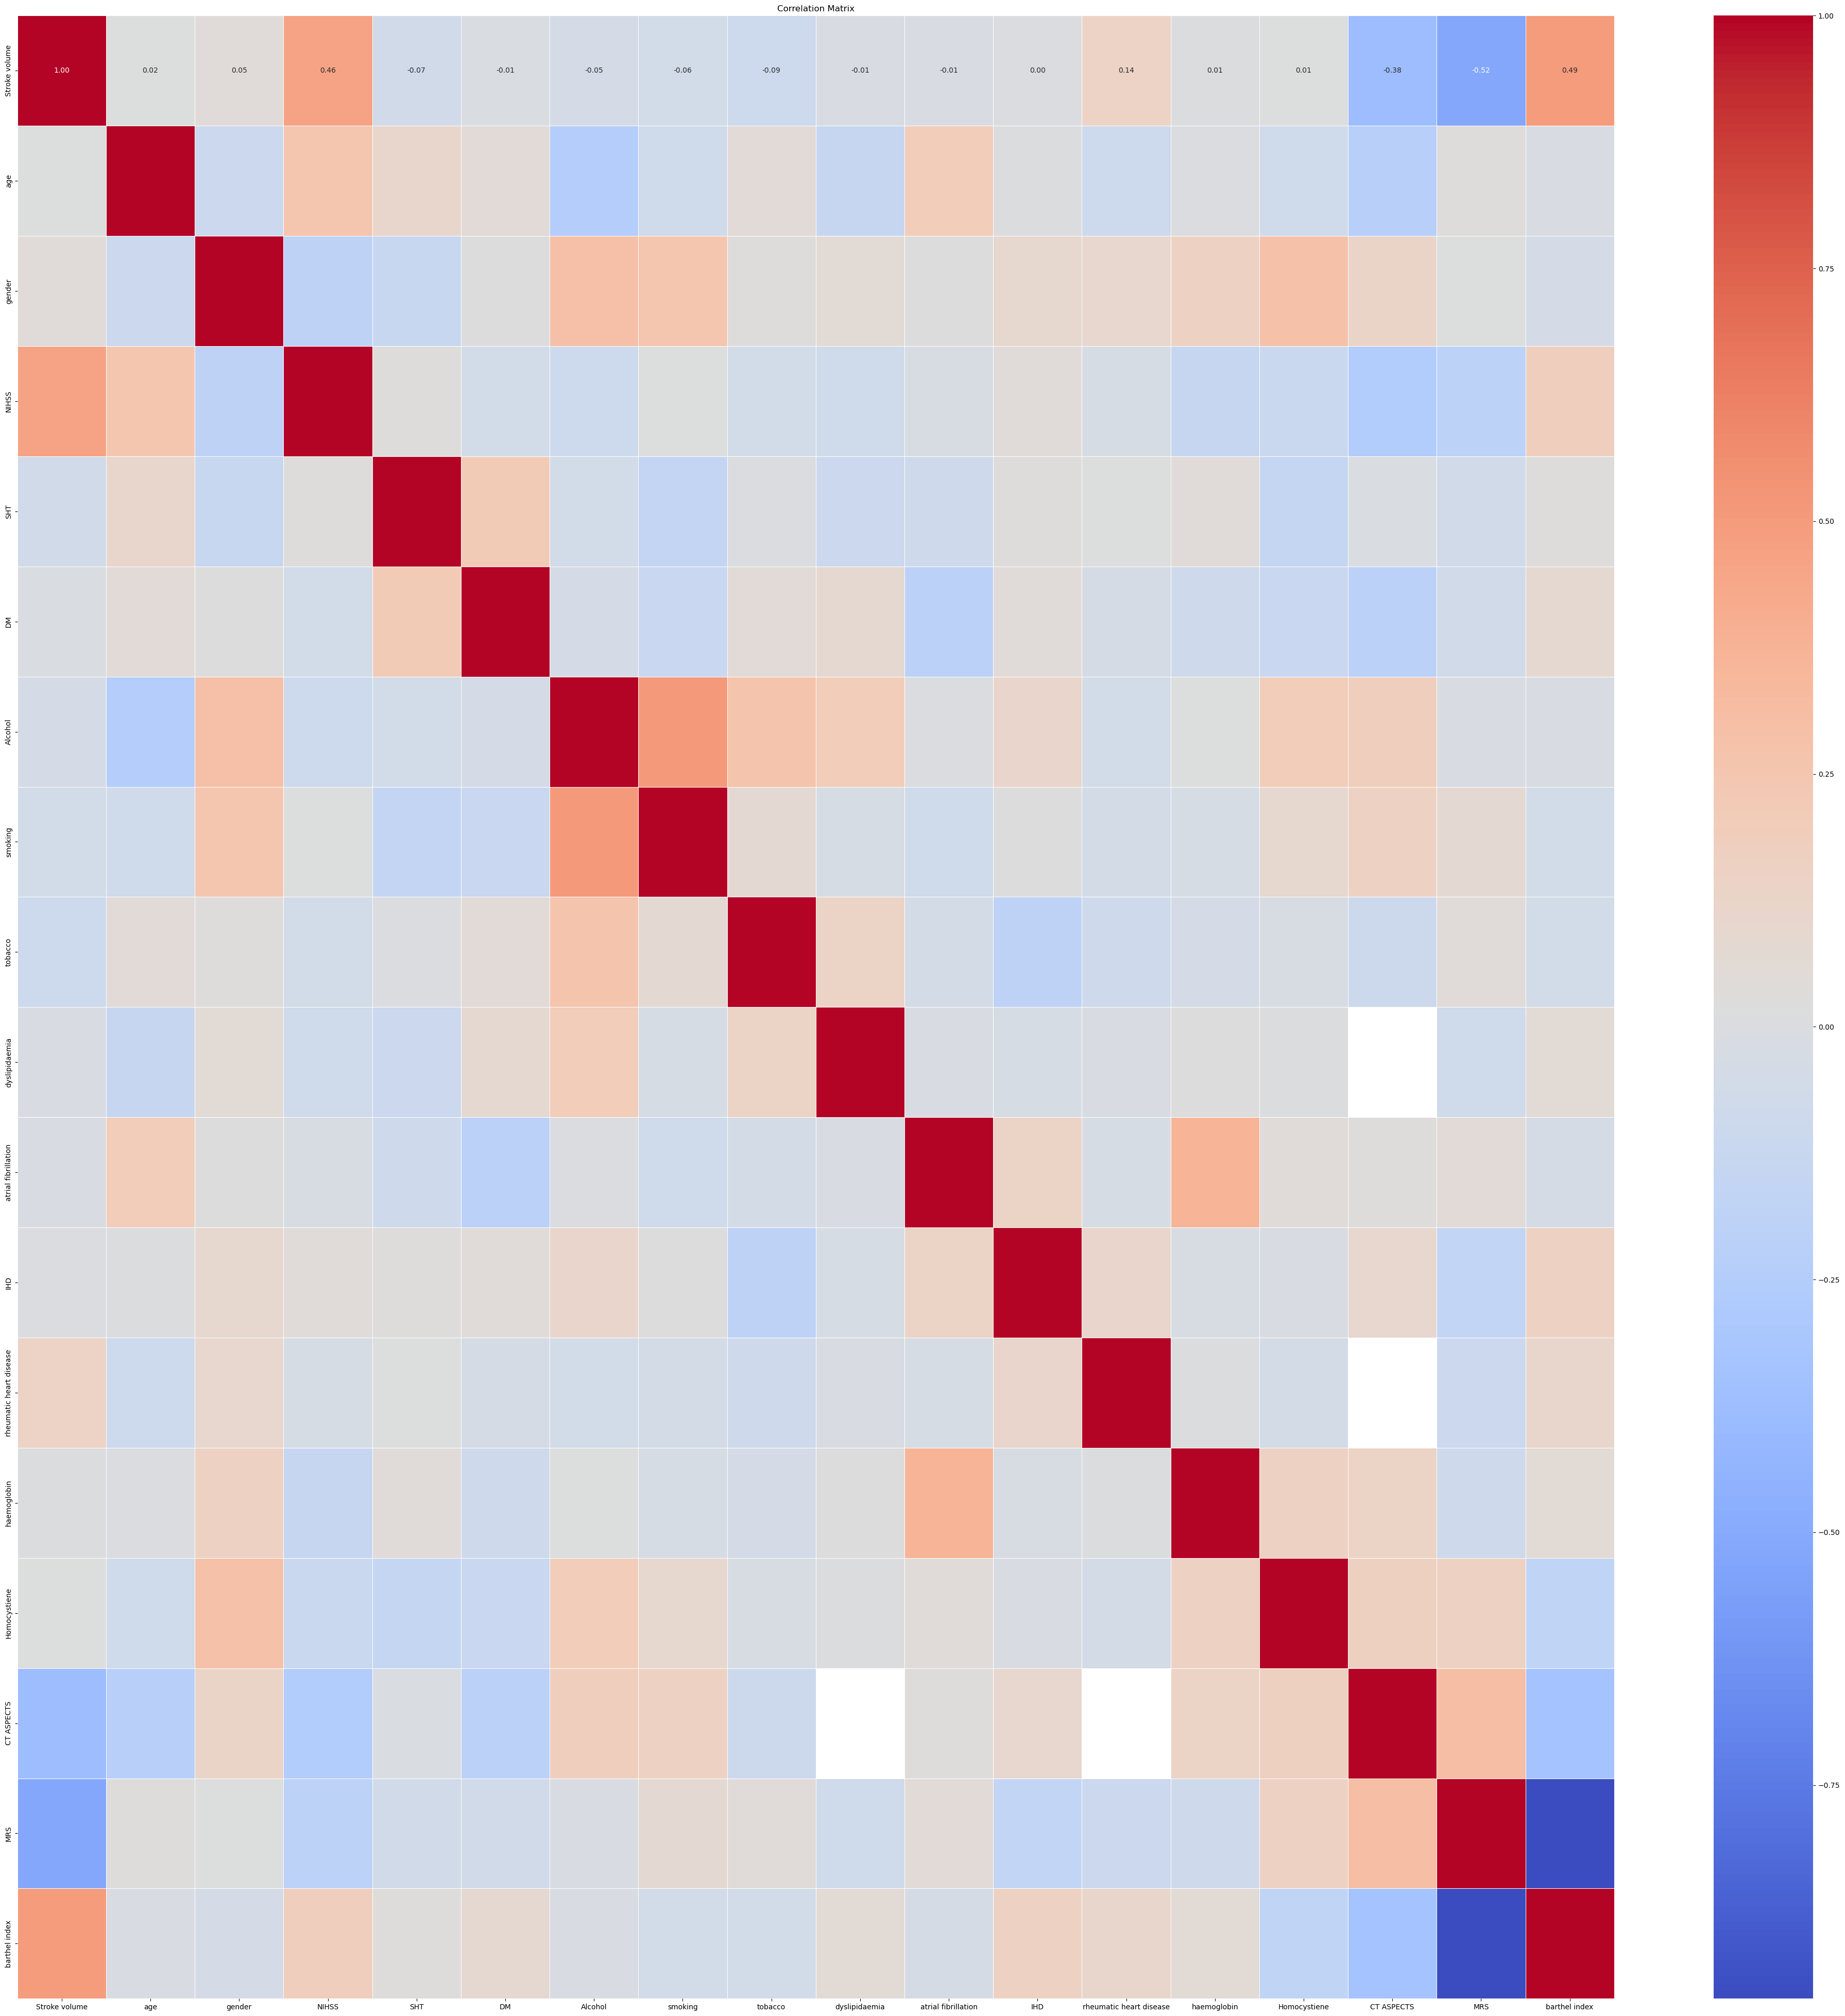

In [3379]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Encoding

### Extracting depednent Features

In [3380]:
y = data.iloc[:,-2].values
z= data.iloc[:,-1].values

In [3381]:
y

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 5., 5.,
       4., 5., 4., 4., 5., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 2., 3., 3., 2., 3., 2., 4., 4., 3., 2., 0., 3.,
       2., 1., 2., 1., 1., 1., 1., 1., 0., 2., 2., 2., 1., 2., 1., 1., 1.,
       2., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 2., 2., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 6., 6.,
       2., 2.])

In [3382]:
z

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   5.,  10.,  15.,  15.,  15.,  20.,  20.,
        25.,  25.,  25.,  30.,  35.,  40.,  40.,  40.,  40.,  40.,  40.,
        45.,  50.,  50.,  50.,  60.,  60.,  60.,  60.,  60.,  65.,  65.,
        65.,  65.,  65.,  70.,  70.,  75.,  75.,  80.,  80.,  80.,  85.,
        85.,  85.,  85.,  85.,  85.,  85.,  85.,  85.,  90.,  90.,  90.,
        90.,  90.,  90.,  90.,  90.,  90.,  95.,  95.,  95.,  95.,  95.,
        95.,  95.,  95.,  95.,  95., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 10

In [3383]:
data.drop(columns=["MRS","barthel index"],inplace=True)

In [3384]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,atrial fibrillation,IHD,rheumatic heart disease,haemoglobin,Homocystiene,CT ASPECTS
0,0.053275,78.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.2,28.51,NaN
1,0.130765,70.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.2,71.00,9.0
2,0.251843,76.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,31.25,NaN
3,0.266373,80.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.6,14.50,9.0
4,0.276052,68.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,12.1,66.00,10.0


In [3385]:
data.shape

(155, 16)

In [3386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stroke volume            155 non-null    float64
 1   age                      153 non-null    float64
 2   gender                   154 non-null    float64
 3   NIHSS                    150 non-null    float64
 4   SHT                      152 non-null    float64
 5   DM                       152 non-null    float64
 6   Alcohol                  152 non-null    float64
 7   smoking                  152 non-null    float64
 8   tobacco                  152 non-null    float64
 9   dyslipidaemia            152 non-null    float64
 10  atrial fibrillation      152 non-null    float64
 11  IHD                      152 non-null    float64
 12  rheumatic heart disease  152 non-null    float64
 13  haemoglobin              147 non-null    float64
 14  Homocystiene             1

In [3387]:
data.describe()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,atrial fibrillation,IHD,rheumatic heart disease,haemoglobin,Homocystiene,CT ASPECTS
count,155.000000,153.000000,154.000000,150.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,147.000000,135.000000,81.000000
mean,13.647040,59.986928,0.668831,7.200000,0.618421,0.467105,0.144737,0.111842,0.256579,0.006579,0.046053,0.098684,0.019737,13.797959,24.751111,8.839506
std,16.601312,14.157008,0.472169,5.995524,0.487380,0.500566,0.352998,0.316214,0.438189,0.081111,0.210292,0.299223,0.139554,10.967714,21.317416,1.317733
min,0.053275,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.650000,3.000000
25%,1.796805,50.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.550000,11.765000,8.000000
50%,6.993500,60.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,18.440000,9.000000
75%,19.149750,71.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.600000,28.755000,10.000000
max,67.707100,92.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,143.000000,138.000000,10.000000


### Imputation

In [3388]:
data.isna().sum()

Stroke volume               0
age                         2
gender                      1
NIHSS                       5
SHT                         3
DM                          3
Alcohol                     3
smoking                     3
tobacco                     3
dyslipidaemia               3
atrial fibrillation         3
IHD                         3
rheumatic heart disease     3
haemoglobin                 8
Homocystiene               20
CT ASPECTS                 74
dtype: int64

In [3389]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]

# Impute missing values in binary columns with the mode
for col in binary_columns:
    mode_val = data[col].mode()[0]  # Compute mode (most frequent value)
    data[col].fillna(mode_val, inplace=True)  # Fill missing values with mode

# Now missing values in binary columns are imputed with the mode (most frequent value)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_12624\3567472907.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_val, inplace=True)  # Fill missing values with mode


In [3390]:
data.isna().sum()

Stroke volume               0
age                         2
gender                      0
NIHSS                       5
SHT                         0
DM                          0
Alcohol                     0
smoking                     0
tobacco                     0
dyslipidaemia               0
atrial fibrillation         0
IHD                         0
rheumatic heart disease     0
haemoglobin                 8
Homocystiene               20
CT ASPECTS                 74
dtype: int64


data.isna().sum()

Stroke volume               0
age                         1
gender                      0
NIHSS                       3
SHT                         0
DM                          0
Alcohol                     0
smoking                     0
tobacco                     0
dyslipidaemia               0
atrial fibrillation         0
IHD                         0
rheumatic heart disease     0
haemoglobin                 3
Homocystiene               15
CT ASPECTS                 50

In [3391]:
columns_with_missing_values = data.columns[data.isna().any()].tolist()
print(columns_with_missing_values)

['age', 'NIHSS', 'haemoglobin', 'Homocystiene', 'CT ASPECTS']


In [3392]:
X = data.values

In [3393]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, data.columns.isin(columns_with_missing_values)])
X[:, data.columns.isin(columns_with_missing_values)] = imputer.transform(X[:, data.columns.isin(columns_with_missing_values)])

In [3394]:
X

array([[5.32746000e-02, 7.80000000e+01, 1.00000000e+00, ...,
        1.32000000e+01, 2.85100000e+01, 8.83950617e+00],
       [1.30765000e-01, 7.00000000e+01, 1.00000000e+00, ...,
        1.12000000e+01, 7.10000000e+01, 9.00000000e+00],
       [2.51843000e-01, 7.60000000e+01, 1.00000000e+00, ...,
        4.00000000e+00, 3.12500000e+01, 8.83950617e+00],
       ...,
       [5.64516000e+01, 8.50000000e+01, 0.00000000e+00, ...,
        1.37979592e+01, 2.47511111e+01, 8.83950617e+00],
       [2.31018000e+00, 7.90000000e+01, 0.00000000e+00, ...,
        6.90000000e+00, 1.84000000e+01, 8.83950617e+00],
       [4.22322000e+00, 5.99869281e+01, 1.00000000e+00, ...,
        1.37979592e+01, 2.47511111e+01, 8.83950617e+00]])

In [3395]:
X[0]

array([5.32746000e-02, 7.80000000e+01, 1.00000000e+00, 3.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.32000000e+01, 2.85100000e+01, 8.83950617e+00])

In [3396]:
np.isnan(X).sum()

0

## Spliting data

In [3397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [3398]:
X_train.shape

(124, 16)

## Normalization

In [3399]:
numerical_columns = ['Stroke volume', 'age', 'NIHSS', 'haemoglobin', 'Homocystiene', 'CT ASPECTS']
numerical_columns_mask = data.columns.isin(numerical_columns)
print(numerical_columns_mask)

[ True  True False  True False False False False False False False False
 False  True  True  True]


In [3400]:
data1 = pd.DataFrame(X_train)
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.460098,62.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.4,52.70,8.839506
1,4.523490,65.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,20.04,9.000000
2,1.607920,59.0,1.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,15.4,9.38,10.000000
3,2.310180,79.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9,18.40,8.839506
4,3.516120,55.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.2,10.90,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,35.122500,32.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.5,11.60,8.839506
120,39.500600,45.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.1,22.79,8.839506
121,6.625410,72.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.5,25.00,9.000000
122,44.072500,68.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.4,20.73,7.000000


In [3401]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, numerical_columns_mask] = sc.fit_transform(X_train[:, numerical_columns_mask])
X_test[:, numerical_columns_mask] = sc.transform(X_test[:, numerical_columns_mask])

In [3402]:
data2 = pd.DataFrame(X_train)
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.802426,0.135082,1.0,-0.517302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026733,1.373861,0.000705
1,-0.553209,0.358405,1.0,0.446422,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.091632,-0.245877,0.163028
2,-0.732027,-0.088241,1.0,-0.324557,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.111280,-0.774548,1.174427
3,-0.688956,1.400580,0.0,0.639167,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.607367,-0.327211,0.000705
4,-0.614993,-0.386005,1.0,0.253677,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.074723,-0.699165,-0.848371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.323496,-2.098149,1.0,0.639167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.035188,-0.664449,0.000705
120,1.592014,-1.130415,0.0,0.831912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.083177,-0.109493,0.000705
121,-0.424294,0.879493,0.0,0.060932,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.218452,0.000109,0.163028
122,1.872419,0.581729,1.0,0.060932,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.142360,-0.211657,-1.859770


## Importing Different Models

In [3403]:
#! pip install catboost

In [3404]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Model Training

In [3405]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Linear Regression trained successfully.
Lasso trained successfully.
Ridge trained successfully.
K-Neighbors Regressor trained successfully.
Decision Tree trained successfully.
Random Forest Regressor trained successfully.
XGBRegressor trained successfully.
CatBoosting Regressor trained successfully.
AdaBoost Regressor trained successfully.


## Model Evaluation

In [3406]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

evaluation_results = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    evaluation_results.append({
        "Model": name,
        "Train MAE": model_train_mae,
        "Train RMSE": model_train_rmse,
        "Train R^2": model_train_r2,
        "Test MAE": model_test_mae,
        "Test RMSE": model_test_rmse,
        "Test R^2": model_test_r2
    })

evaluation_df = pd.DataFrame(evaluation_results)
sorted_df = evaluation_df.sort_values(by="Test R^2", ascending=False)
sorted_df

,Model,Train MAE,Train RMSE,Train R^2,Test MAE,Test RMSE,Test R^2
8,AdaBoost Regressor,0.364887,0.440121,0.956232,0.465849,0.522437,0.920757
4,Decision Tree,0.000000,0.000000,1.000000,0.322581,0.567962,0.906344
7,CatBoosting Regressor,0.039384,0.052842,0.999369,0.511965,0.644892,0.879255
5,Random Forest Regressor,0.221129,0.346289,0.972905,0.488065,0.727100,0.846509
6,XGBRegressor,0.000758,0.001087,1.000000,0.634560,1.044991,0.682955
3,K-Neighbors Regressor,1.116129,1.444455,0.528570,1.238710,1.440430,0.397607
2,Ridge,1.360596,1.679028,0.363022,1.373413,1.586136,0.269574
0,Linear Regression,1.354414,1.677323,0.364314,1.392351,1.614980,0.242767
1,Lasso,1.774716,2.073520,0.028539,1.567479,1.839135,0.017975


In [3407]:
sorted_df.to_csv('Model Evaluation.csv', index = False)

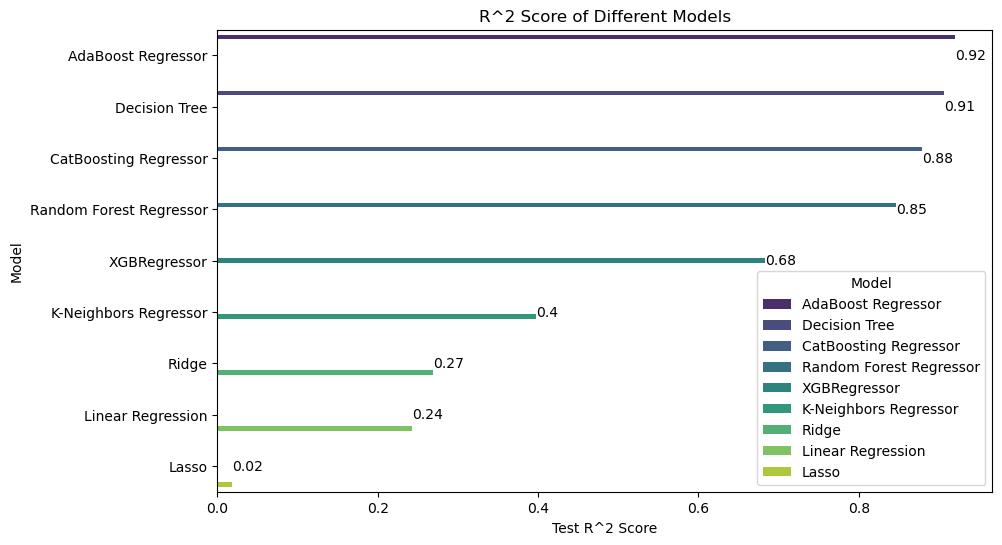

In [3408]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Test R^2', y='Model', hue='Model', data=sorted_df, palette='viridis')

for i, val in enumerate(sorted_df['Test R^2']):
    barplot.text(val, i, round(val, 2), va='center')

plt.xlabel('Test R^2 Score')
plt.ylabel('Model')
plt.title('R^2 Score of Different Models')
plt.savefig('R2.png')
plt.show()

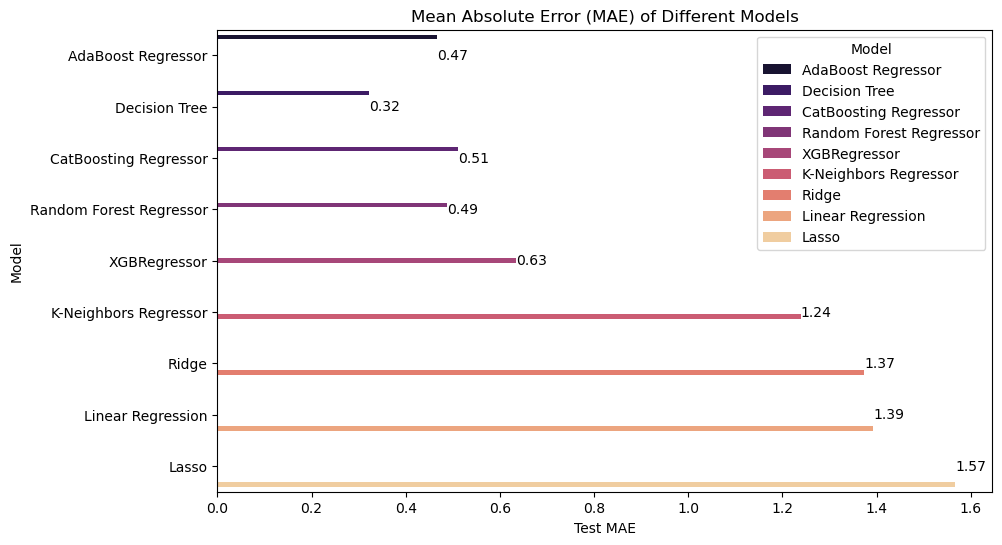

In [3409]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Test MAE', y='Model', hue='Model', data=sorted_df, palette='magma')

for i, val in enumerate(sorted_df['Test MAE']):
    barplot.text(val, i, round(val, 2), va='center')

plt.xlabel('Test MAE')
plt.ylabel('Model')
plt.title('Mean Absolute Error (MAE) of Different Models')
plt.savefig('MAE.png')
plt.show()

In [3410]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Test RMSE', y='Model', hue='Model', data=sorted_df, palette='rocket')

for i, val in enumerate(sorted_df['Test RMSE']):
    barplot.text(val, i, round(val, 2), va='center')

plt.xlabel('Test RMSE')
plt.ylabel('Model')
plt.title('Root Mean Squared Error (RMSE) of Different Models')
plt.savefig('RMSE.png')
plt.show()

## Deep Learning Approach

In [ ]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
X_train.shape[1]

16

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
3/3 [==============================] - 3s 133ms/step - loss: 10.2182 - mse: 10.2182 - val_loss: 14.4185 - val_mse: 14.4185
Epoch 2/100
3/3 [==============================] - 0s 44ms/step - loss: 9.5989 - mse: 9.5989 - val_loss: 14.2156 - val_mse: 14.2156
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 8.9249 - mse: 8.9249 - val_loss: 13.9536 - val_mse: 13.9536
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 7.3452 - mse: 7.3452 - val_loss: 13.6963 - val_mse: 13.6963
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 8.2036 - mse: 8.2036 - val_loss: 13.4440 - val_mse: 13.4440
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 8.5639 - mse: 8.5639 - val_loss: 13.2077 - val_mse: 13.2077
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 6.5169 - mse: 6.5169 - val_loss: 12.9686 - val_mse: 12.9686
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 6

In [ ]:
loss, mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Data:", mse)

# Predictions
predictions = model.predict(X_test).astype(int)
r2 = r2_score(y_test, predictions)
print("R^2 Score on Test Data:", r2)


1/1 [==============================] - 0s 68ms/step - loss: 6.0890 - mse: 6.0890
Mean Squared Error on Test Data: 6.088991165161133


1/1 [==============================] - 0s 225ms/step
R^2 Score on Test Data: -0.4358974358974359


In [ ]:
# CART, PERT, Random Forest Bagging & Boosting(Entropy or Gini indix), SVM(All Kernels), K_Folds